In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
from matplotlib import image
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
from timeit import default_timer as timer

def get_dominant_color(id):
    start = timer()
    img = image.imread(r'../Data/Images/' + str(id) + '.jpg')
    np_img = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]))
    np_flat_img = whiten(np_img)
    cluster_centers, distortion = kmeans(np_flat_img, 5)
    end = timer()
    print('{0}: {1:.2f}s'.format(id, end - start))
    return {'std_red': np_img[:, 0].std(),
            'std_green': np_img[:, 1].std(),
            'std_blue': np_img[:, 0].std(),
            '1_red': cluster_centers[0][0],
            '1_green': cluster_centers[0][1],
            '1_blue': cluster_centers[0][2],
            '2_red': cluster_centers[1][0],
            '2_green': cluster_centers[1][1],
            '2_blue': cluster_centers[1][2],
            '3_red': cluster_centers[2][0],
            '3_green': cluster_centers[2][1],
            '3_blue': cluster_centers[2][2],
            '4_red': cluster_centers[3][0],
            '4_green': cluster_centers[3][1],
            '4_blue': cluster_centers[3][2],
            '5_red': cluster_centers[4][0],
            '5_green': cluster_centers[4][1],
            '5_blue': cluster_centers[4][2]
           }
    

In [88]:
temp = get_dominant_color(25)

25: 1.63s


In [98]:
movies = pd.read_csv(r'../Data/movies_df.csv', index_col=0)

In [97]:
temp = movies[:50].apply(lambda x: get_dominant_color(x['id']), axis=1, result_type='expand')

299537: 4.21s
166428: 4.24s
399579: 10.86s
450001: 5.29s
338952: 4.20s
324857: 3.78s
400650: 7.46s
464504: 4.90s
297802: 6.05s
512196: 2.40s
450465: 5.89s
490132: 2.49s
428078: 3.26s
299536: 4.61s
920: 5.17s
487297: 4.03s
280217: 2.31s
480530: 5.82s
424694: 3.93s
449563: 6.13s
390634: 5.45s
245891: 2.74s
458723: 1.88s
445629: 4.12s
332562: 3.23s
404368: 4.51s
10528: 6.22s
429197: 0.89s
438650: 3.43s
490033: 3.13s
335983: 5.20s
452832: 7.23s
504172: 4.28s
491418: 5.24s
375588: 3.85s
337167: 4.59s
543103: 6.35s
400157: 4.08s
375262: 4.35s
122917: 4.98s
399402: 2.09s
118340: 4.53s
284054: 4.87s
443055: 3.11s
671: 3.96s
474214: 4.22s
522681: 3.52s
24428: 4.38s
220882: 2.97s
438799: 2.17s


In [96]:
get_dominant_color(438650)

438650: 3.41s


{'std_red': 61.67500155718919,
 'std_green': 65.25546075208842,
 'std_blue': 61.67500155718919,
 '1_red': 3.4814028477544334,
 '1_green': 3.323404483534797,
 '1_blue': 3.1593809692944395,
 '2_red': 2.748951982793838,
 '2_green': 0.6484781895372661,
 '2_blue': 0.6215751435277537,
 '3_red': 1.7552146140210236,
 '3_green': 1.8343239773966977,
 '3_blue': 1.6834693669908434,
 '4_red': 2.821372679759427,
 '4_green': 2.9499454696551797,
 '4_blue': 2.9814974127593654,
 '5_red': 0.9568897112761853,
 '5_green': 0.8855136089778808,
 '5_blue': 0.7816854700565488}

In [99]:
movies[25:30]

,id,title,release_date,poster_path,Mystery,Animation,Music,History,Comedy,Science Fiction,...,Horror,War,Documentary,TV Movie,Adventure,Drama,Western,Thriller,Action,Crime
25,404368,Ralph Breaks the Internet,2018-11-20,/lvfIaThG5HA8THf76nghKinjjji.jpg,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26,10528,Sherlock Holmes,2009-12-23,/22ngurXbLqab7Sko6aTSdwOCe5W.jpg,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
27,429197,Vice,2018-12-25,/e0NZxqQ4B8YZ6kRrZish2DPqtdi.jpg,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
28,438650,Cold Pursuit,2019-02-07,/hXgmWPd1SuujRZ4QnKLzrj79PAw.jpg,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
29,490033,Holiday,2018-10-11,/vlDRxVM3XCwq7ty9MmHoVeOcvWp.jpg,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [104]:
df = pd.merge(movies, temp, left_index=True, right_index=True, )

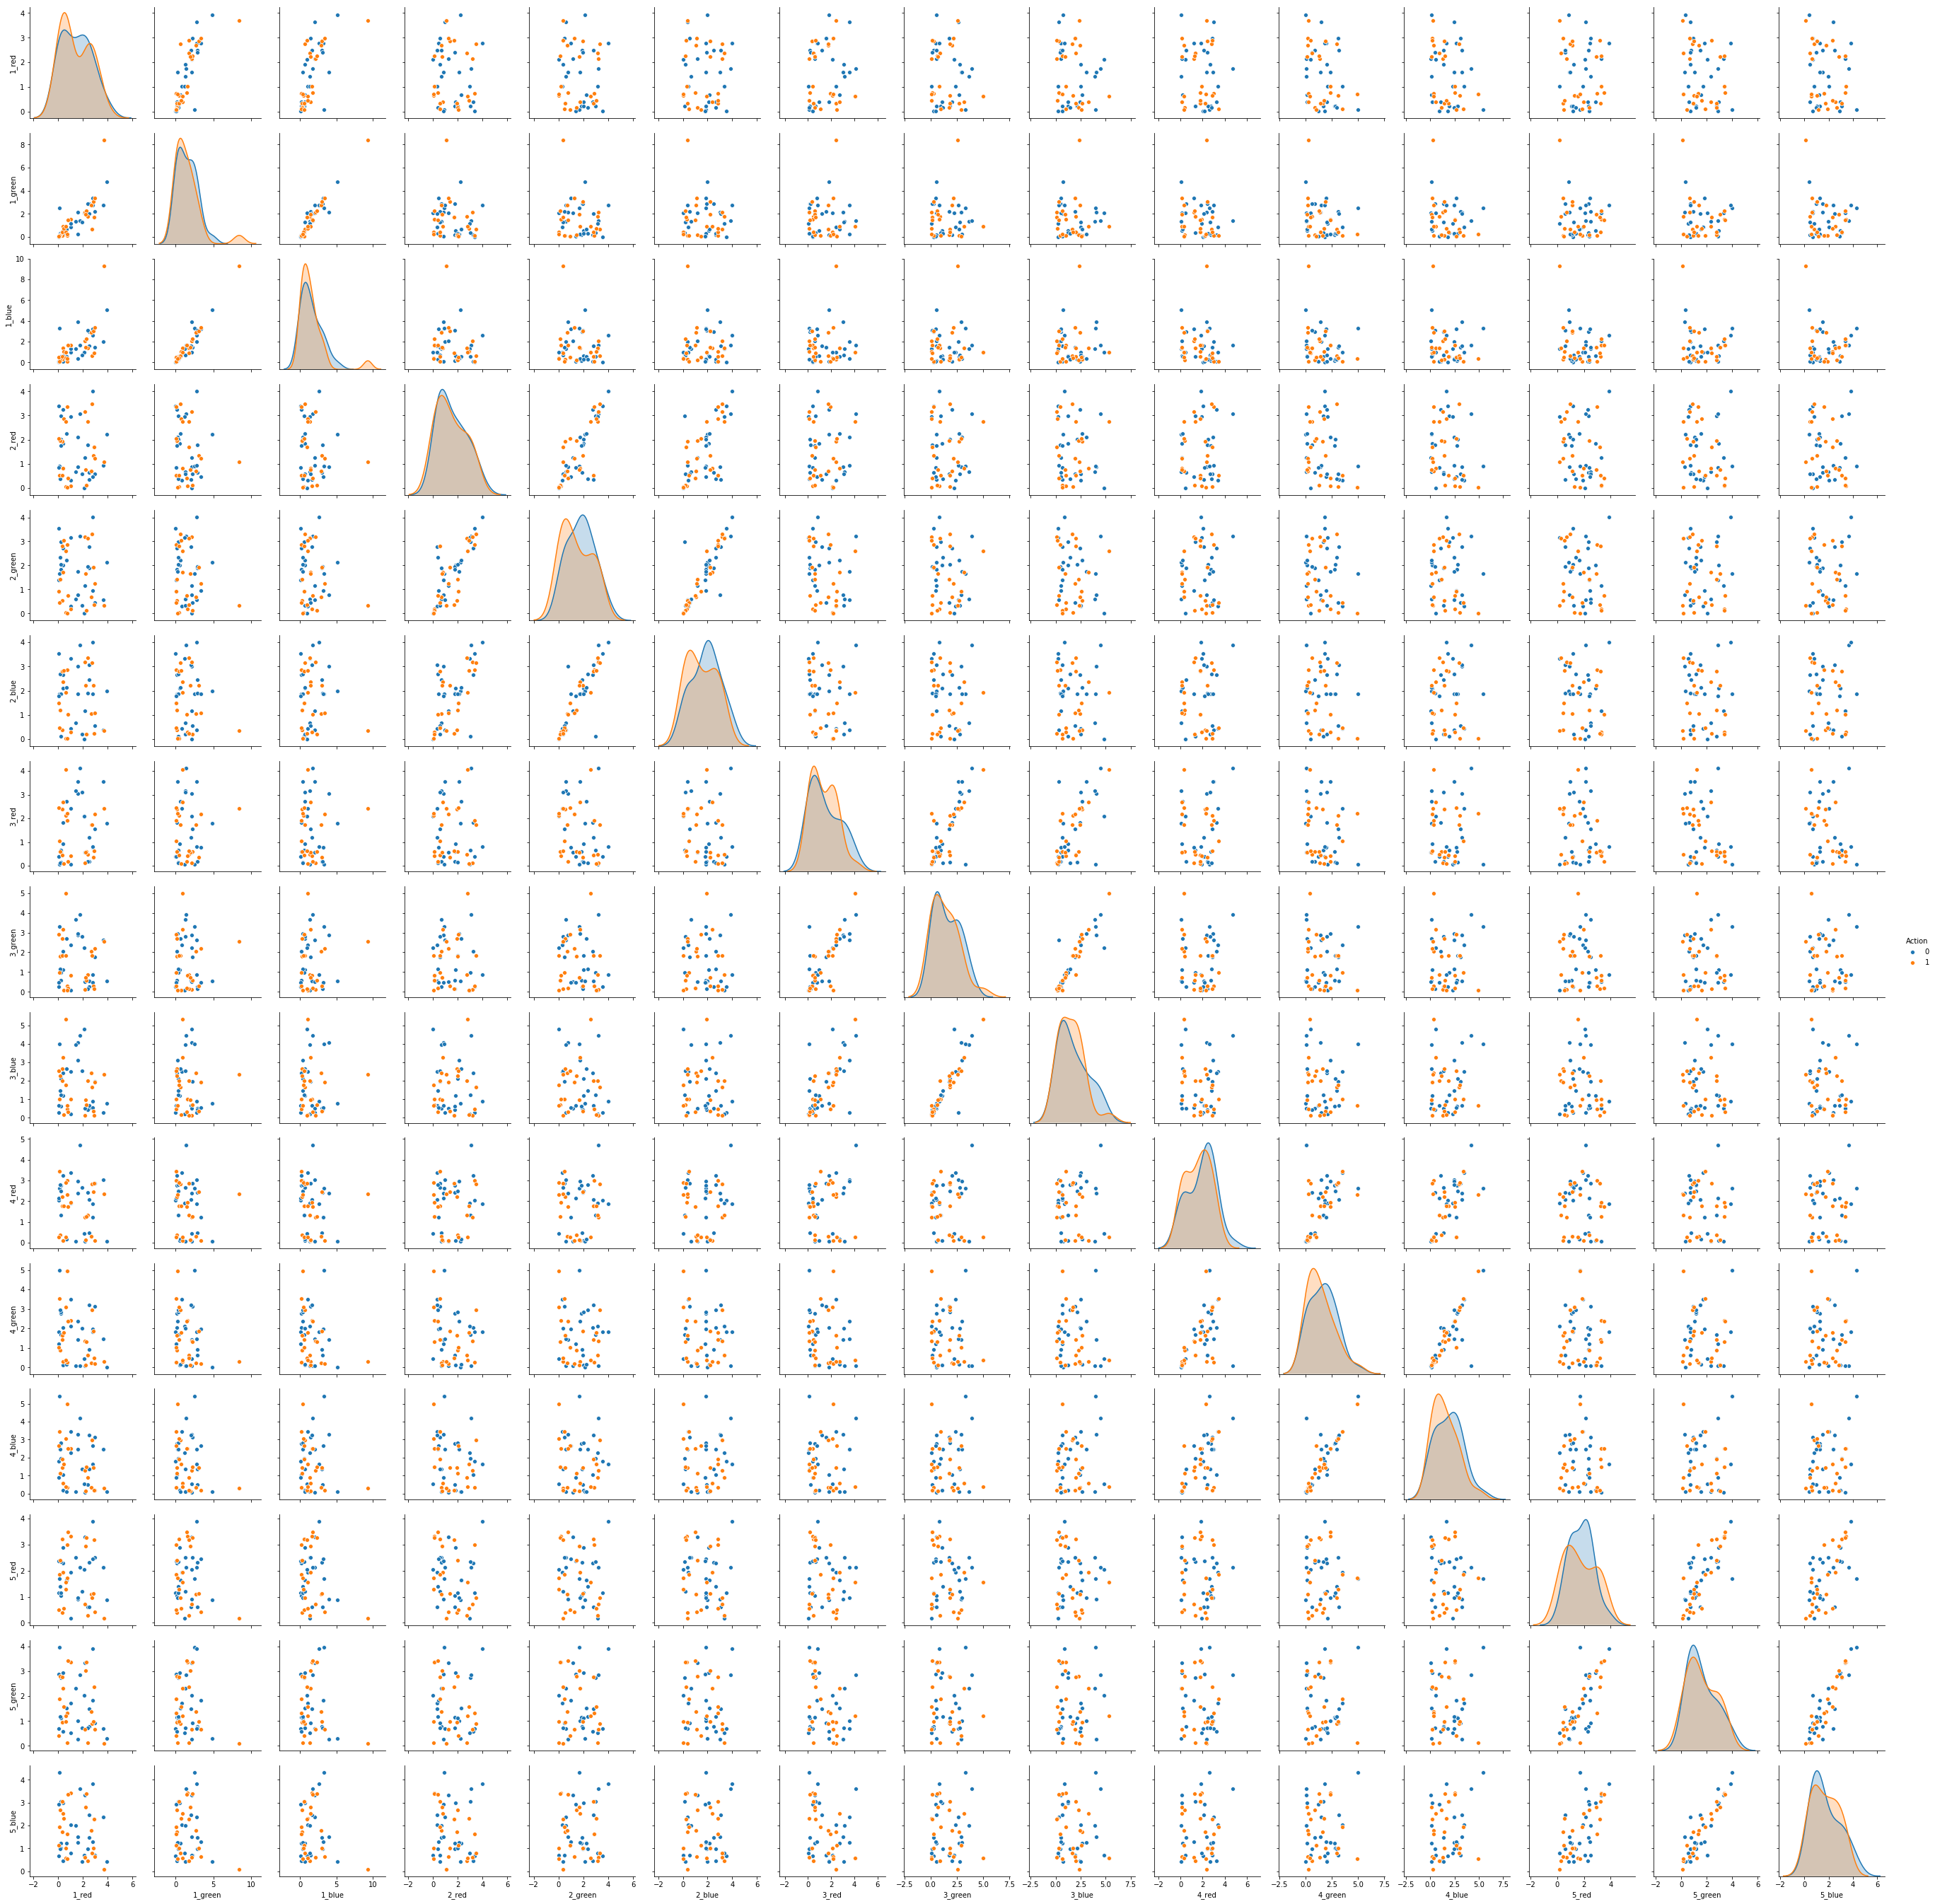

In [108]:
sns.pairplot(df, vars=['1_red', '1_green', '1_blue',
                       '2_red', '2_green','2_blue',
                       '3_red','3_green','3_blue',
                       '4_red', '4_green','4_blue',
                        '5_red', '5_green', '5_blue'], hue='Action')

In [110]:
from sklearn.model_selection import train_test_split

In [121]:
y = df[['Action', 'Adventure', 'Comedy', 'Horror', 'Animation']]
X = df[['1_red', '1_green', '1_blue',
        '2_red', '2_green','2_blue',
                       '3_red','3_green','3_blue',
                       '4_red', '4_green','4_blue',
                        '5_red', '5_green', '5_blue']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
from sklearn.svm import SVC

In [123]:
model = SVC()

In [116]:
predictions = model.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix, classification_report

In [118]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[2 6]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.25      1.00      0.40         2

   micro avg       0.40      0.40      0.40        10
   macro avg       0.62      0.62      0.40        10
weighted avg       0.85      0.40      0.40        10

